CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


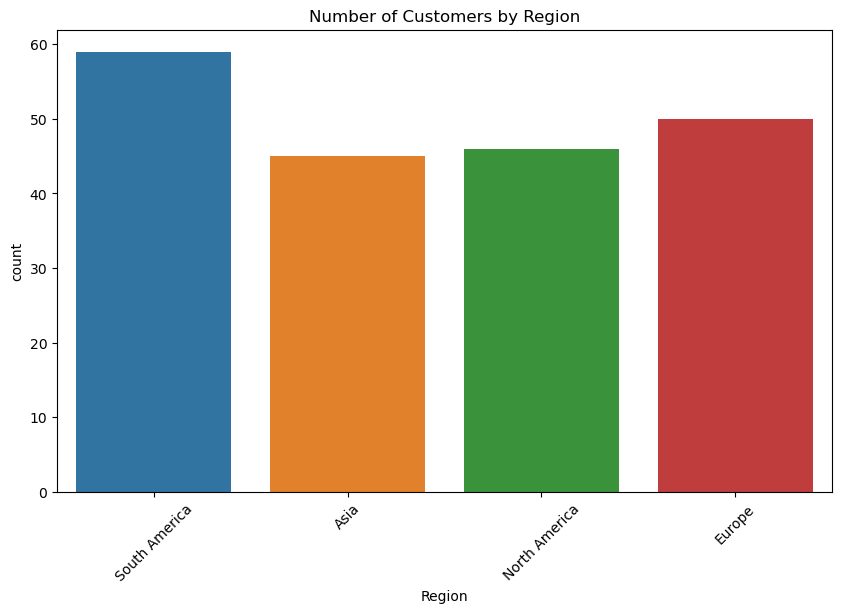

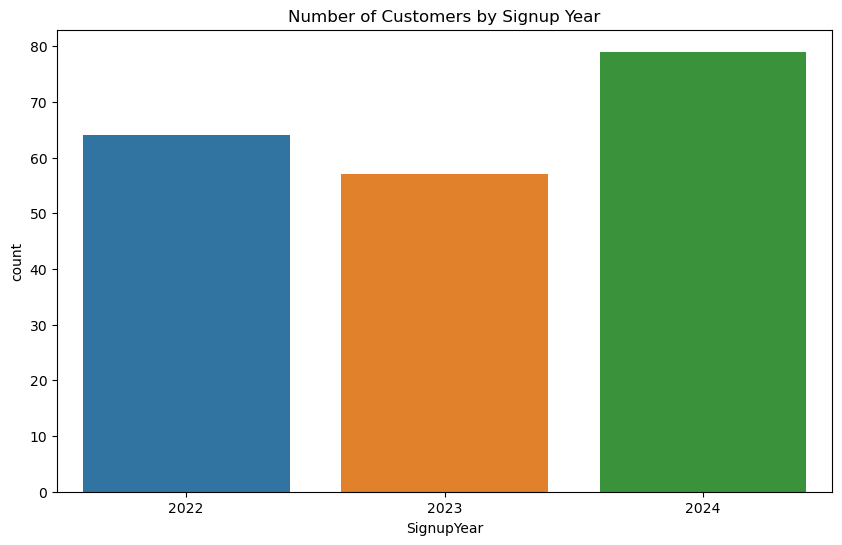

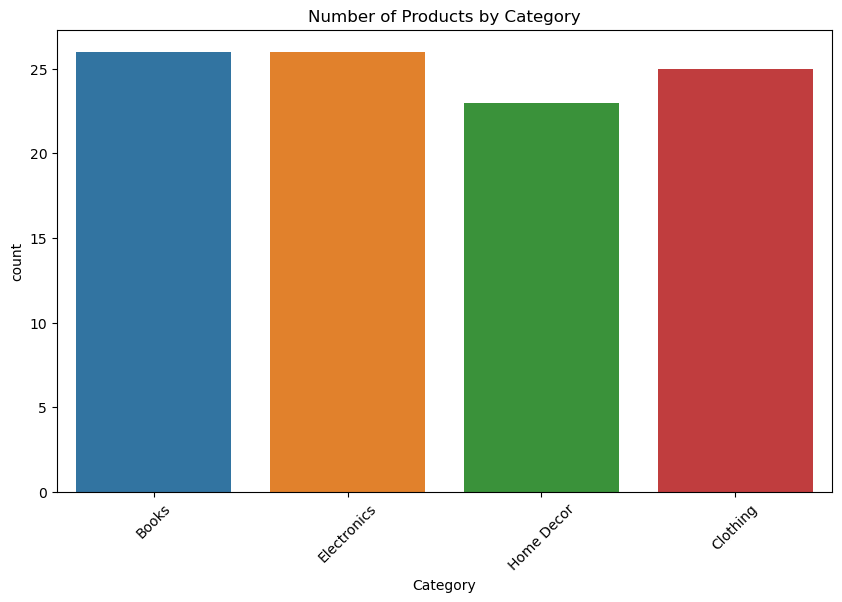

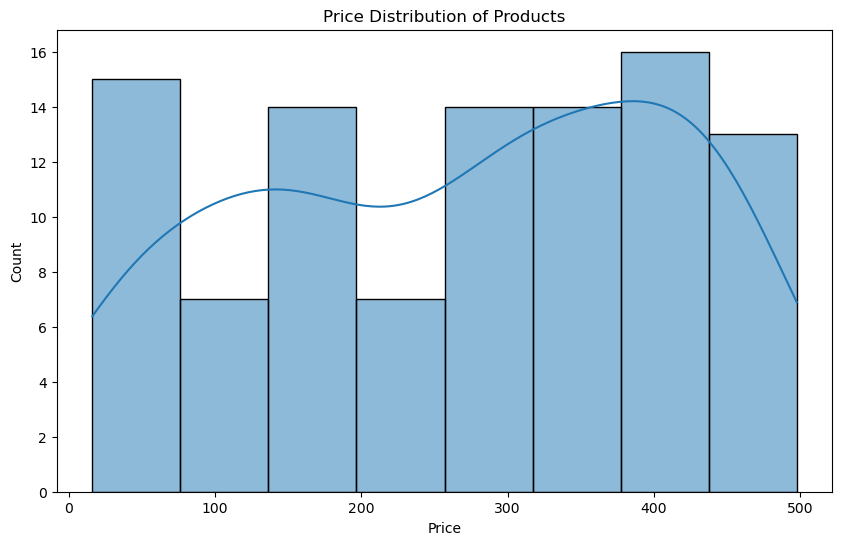

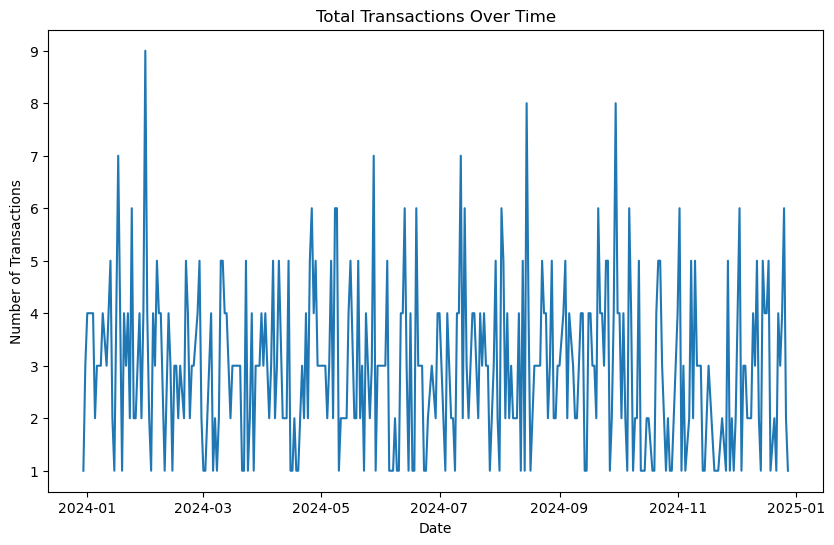

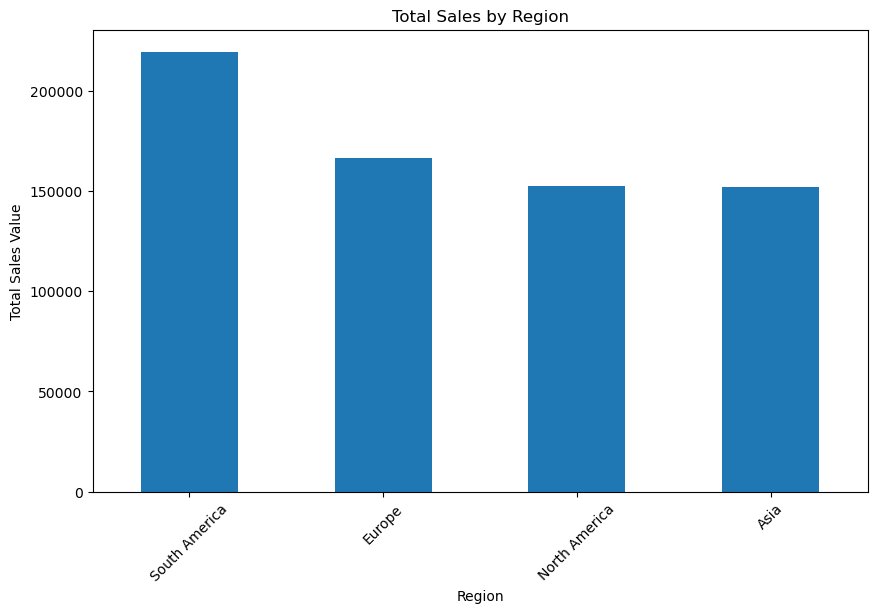

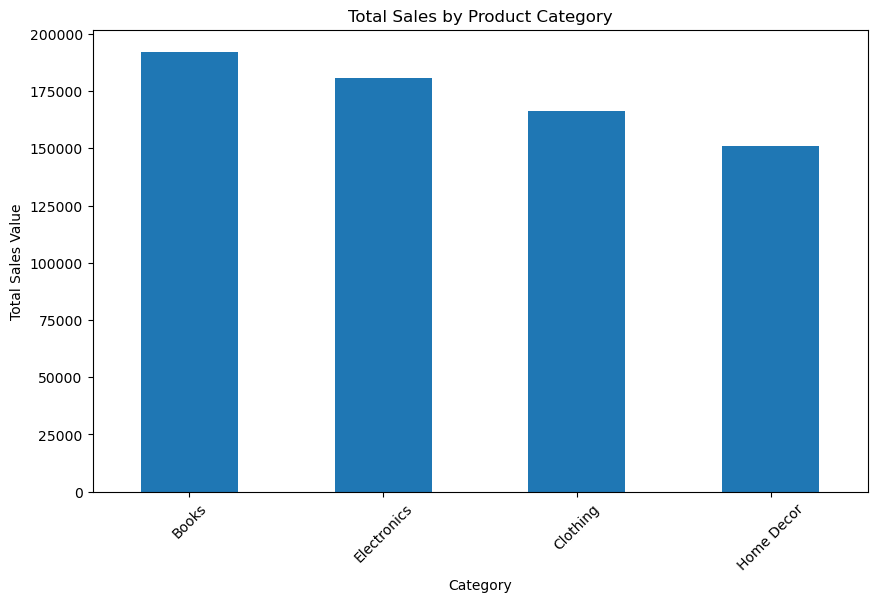

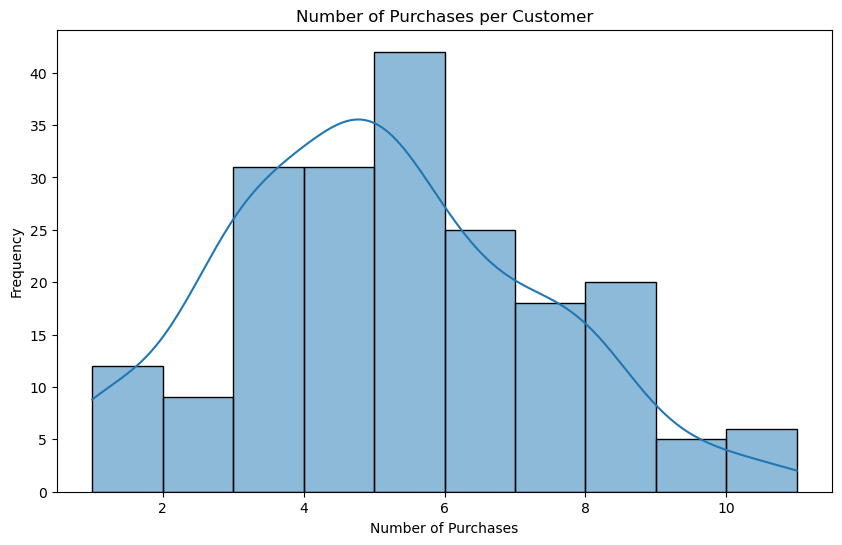

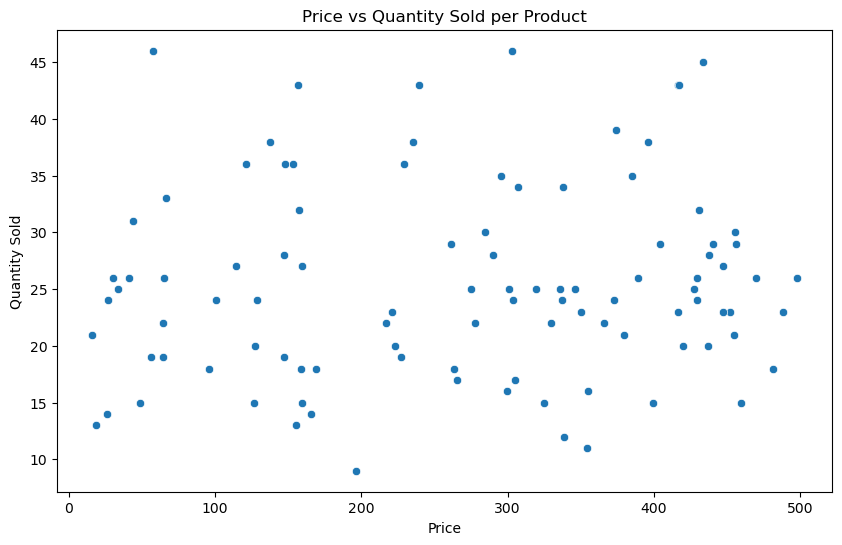

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Data Preprocessing
# Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Check for duplicates
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check data types
print(customers_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)

# Merge data to get complete insights
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left') \
                           .merge(products_df, on='ProductID', how='left', suffixes=('_transaction', '_product'))

# 1. Customer Analysis
# Number of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Number of Customers by Region')
plt.xticks(rotation=45)
plt.show()

# Customers' sign-up trends
plt.figure(figsize=(10, 6))
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
sns.countplot(data=customers_df, x='SignupYear')
plt.title('Number of Customers by Signup Year')
plt.show()

# 2. Product Analysis
# Number of products by category
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category')
plt.title('Number of Products by Category')
plt.xticks(rotation=45)
plt.show()

# Price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], kde=True)
plt.title('Price Distribution of Products')
plt.show()

# 3. Transaction Analysis
# Total transactions per day
plt.figure(figsize=(10, 6))
transaction_count_by_day = transactions_df.groupby(transactions_df['TransactionDate'].dt.date).size()
transaction_count_by_day.plot(kind='line')
plt.title('Total Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Total transaction value by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# 4. Product Performance
# Total sales per product category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# 5. Customer Analysis - Purchase Frequency
# Number of purchases per customer
customer_purchase_count = merged_df.groupby('CustomerID').size()
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_count, kde=True)
plt.title('Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# 6. Insights on Product Pricing vs. Sales
# Average price vs quantity sold per product
product_performance = merged_df.groupby('ProductID').agg({'Price_product': 'mean', 'Quantity': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_performance, x='Price_product', y='Quantity')
plt.title('Price vs Quantity Sold per Product')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()
